In [ ]:
!wget https://github.com/ladofa/edu/raw/master/samples/left.zip

--2023-07-25 02:36:16--  https://github.com/ladofa/edu/raw/master/samples/left.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ladofa/edu/master/samples/left.zip [following]
--2023-07-25 02:36:17--  https://raw.githubusercontent.com/ladofa/edu/master/samples/left.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364111 (356K) [application/zip]
Saving to: ‘left.zip’

left.zip            100%[===================>] 355.58K  --.-KB/s    in 0.04s   

2023-07-25 02:36:17 (8.51 MB/s) - ‘left.zip’ saved [364111/364111]



In [ ]:
!unzip left.zip

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

In [ ]:
borderSize = (9, 6)
squareSize = 1
boardPoints = [] #실세계 좌표값, 보드의 코너를 (0, 0, 0)으로 했을 때의
for y in range(borderSize[1]):
    for x in range(borderSize[0]):
        boardPoints.append((x * squareSize, y * squareSize, 0))
boardPoints = np.array(boardPoints, np.float32)

imagePoints = []
objectPoints = []
# for i in range(13):
#     image = cv2.imread(f'left{i+1:02d}.jpg')
for root, dirs, files in os.walk('.'):
    for file in files:
        image = cv2.imread(root + '/' + file)
        if image is None:
            continue

        h, w, _ = image.shape

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, corners = cv2.findChessboardCorners(gray, borderSize)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_COUNT, 40, 0.001)
        corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)
        dst = image.copy()
        cv2.drawChessboardCorners(dst, borderSize, corners, True)
        imagePoints.append(corners)
        objectPoints.append(boardPoints)



_, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, (w, h), None, None)
nuCameraMatrix, unknown = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, (w, h), 1)
# mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
map1, map2 = cv2.initUndistortRectifyMap(cameraMatrix, distCoeffs, None, nuCameraMatrix, (w, h), cv2.CV_16SC2)

In [ ]:
f = open('calib.dat', 'wb')
np.save(f, map1)
np.save(f, map2)
f.close()

In [ ]:
f = open('calib.dat', 'rb')
map1 = np.load(f)
map2 = np.load(f)

In [ ]:
map1.shape

(540, 960, 2)

In [ ]:
image = cv2.imread('/content/1824.jpg')

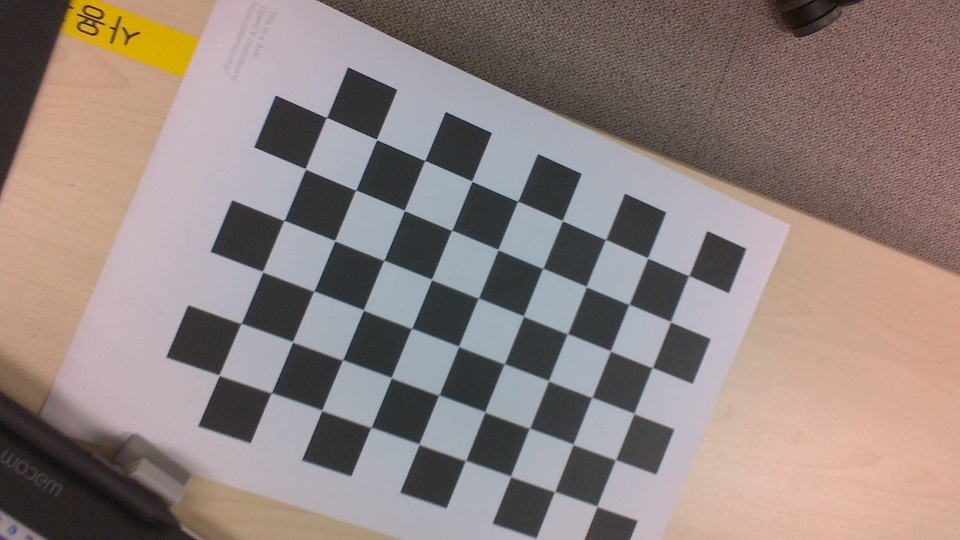

In [ ]:
cv2_imshow(image)

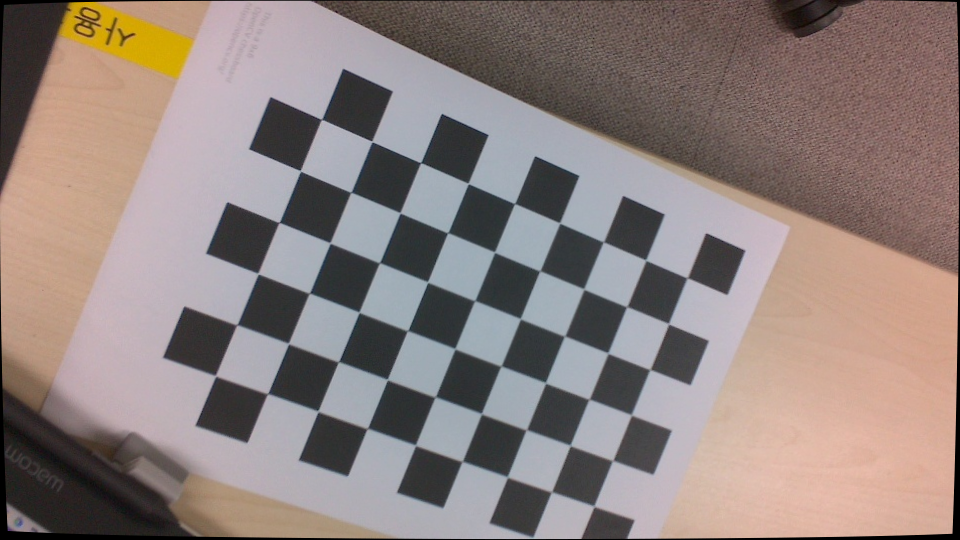

In [ ]:
rec = cv2.remap(image, map1, map2, cv2.INTER_LINEAR)
cv2_imshow(rec)